In [26]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
# Load the RGB image
img_rgb = cv2.imread('img.jpg')
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

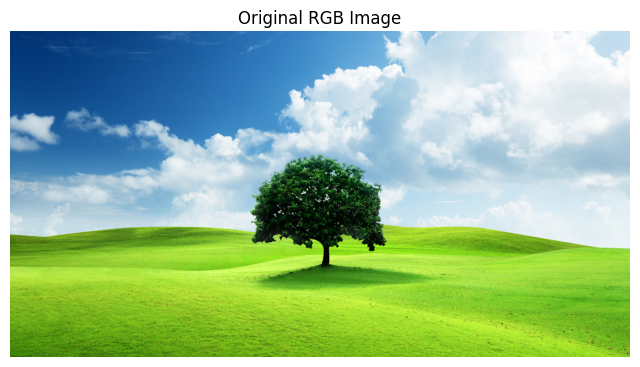

In [3]:
# Display original RGB image
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title('Original RGB Image')
plt.axis('off')
plt.show()

## 1. Image Pre-processing: RGB to Grayscale Conversion

In [4]:
# Convert RGB to Grayscale using built-in OpenCV function
img_gray_builtin = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

In [5]:
# User-defined function for RGB to Grayscale conversion
def rgb_to_grayscale(rgb_img):
    return np.dot(rgb_img[...,:3], [0.299, 0.587, 0.114])

In [6]:
# Apply user-defined grayscale conversion
img_gray_custom = rgb_to_grayscale(img_rgb).astype(np.uint8)

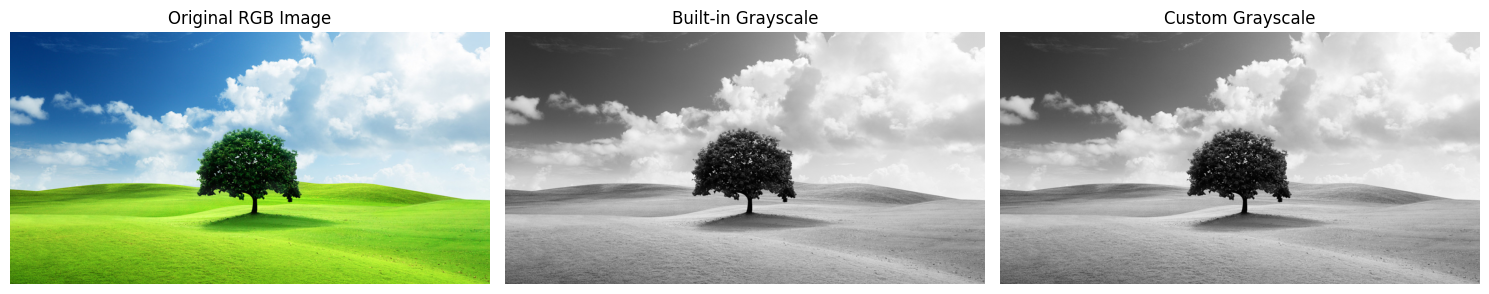

In [7]:
# Compare both grayscale conversion methods
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Original RGB Image')
axes[0].axis('off')

axes[1].imshow(img_gray_builtin, cmap='gray')
axes[1].set_title('Built-in Grayscale')
axes[1].axis('off')

axes[2].imshow(img_gray_custom, cmap='gray')
axes[2].set_title('Custom Grayscale')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Define Sobel X-direction edge detection kernel
sobel_x_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]], dtype=np.float32)

In [9]:
# Define Sharpening filter kernel
sharpening_kernel = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]], dtype=np.float32)

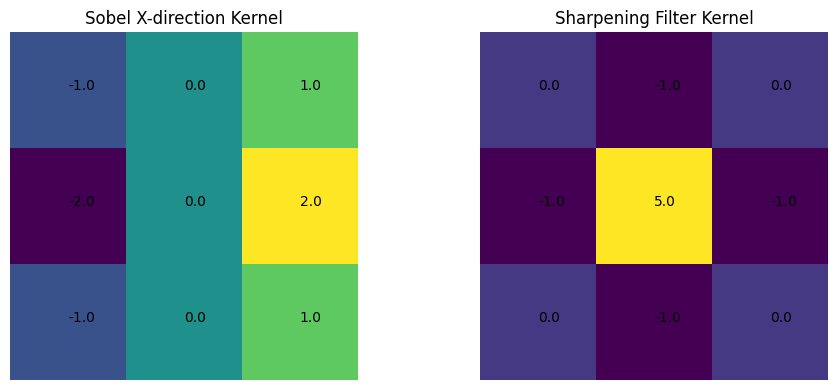

In [10]:
# Display the kernels
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(sobel_x_kernel)
axes[0].set_title('Sobel X-direction Kernel')
axes[0].axis('off')
for i in range(3):
    for j in range(3):
        axes[0].text(j, i, str(sobel_x_kernel[i, j]))

axes[1].imshow(sharpening_kernel)
axes[1].set_title('Sharpening Filter Kernel')
axes[1].axis('off')
for i in range(3):
    for j in range(3):
        axes[1].text(j, i, str(sharpening_kernel[i, j]))

plt.tight_layout()
plt.show()

## 2. Apply Convolution

In [11]:
# Apply convolution with Sobel X-direction kernel using OpenCV
img_sobel_x = cv2.filter2D(img_gray_builtin, -1, sobel_x_kernel)

In [12]:
# Apply convolution with sharpening kernel using OpenCV
img_sharpened = cv2.filter2D(img_gray_builtin, -1, sharpening_kernel)

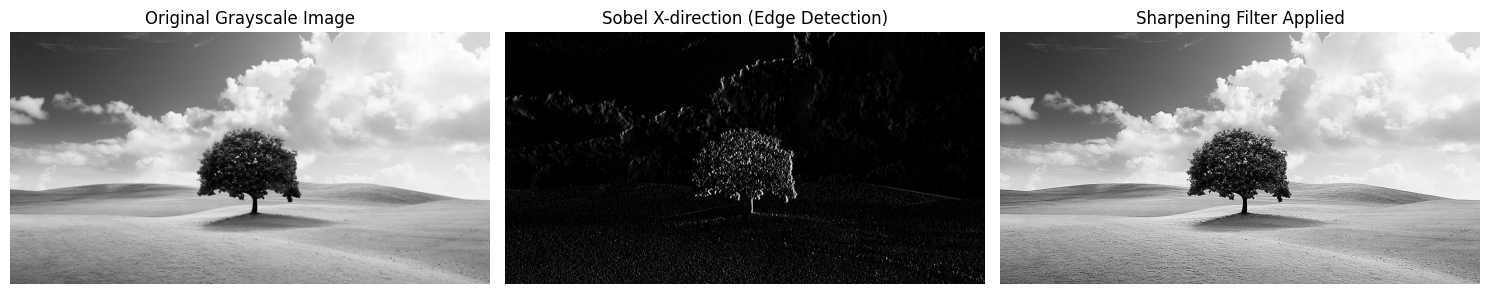

In [13]:
# Display convolution results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_gray_builtin, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(np.abs(img_sobel_x), cmap='gray')
axes[1].set_title('Sobel X-direction (Edge Detection)')
axes[1].axis('off')

axes[2].imshow(img_sharpened, cmap='gray')
axes[2].set_title('Sharpening Filter Applied')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 3. Apply Correlation 

In [14]:
# Apply correlation on grayscale image with Sobel X kernel using scipy
img_corr_sobel = ndimage.correlate(img_gray_builtin.astype(float), sobel_x_kernel, mode='constant')

In [15]:
# Apply correlation on grayscale image with sharpening kernel using scipy
img_corr_sharp = ndimage.correlate(img_gray_builtin.astype(float), sharpening_kernel, mode='constant')

In [16]:
# Apply correlation on convolved images (correlation of correlation)
img_corr_on_conv_sobel = ndimage.correlate(img_sobel_x.astype(float), sobel_x_kernel, mode='constant')
img_corr_on_conv_sharp = ndimage.correlate(img_sharpened.astype(float), sharpening_kernel, mode='constant')

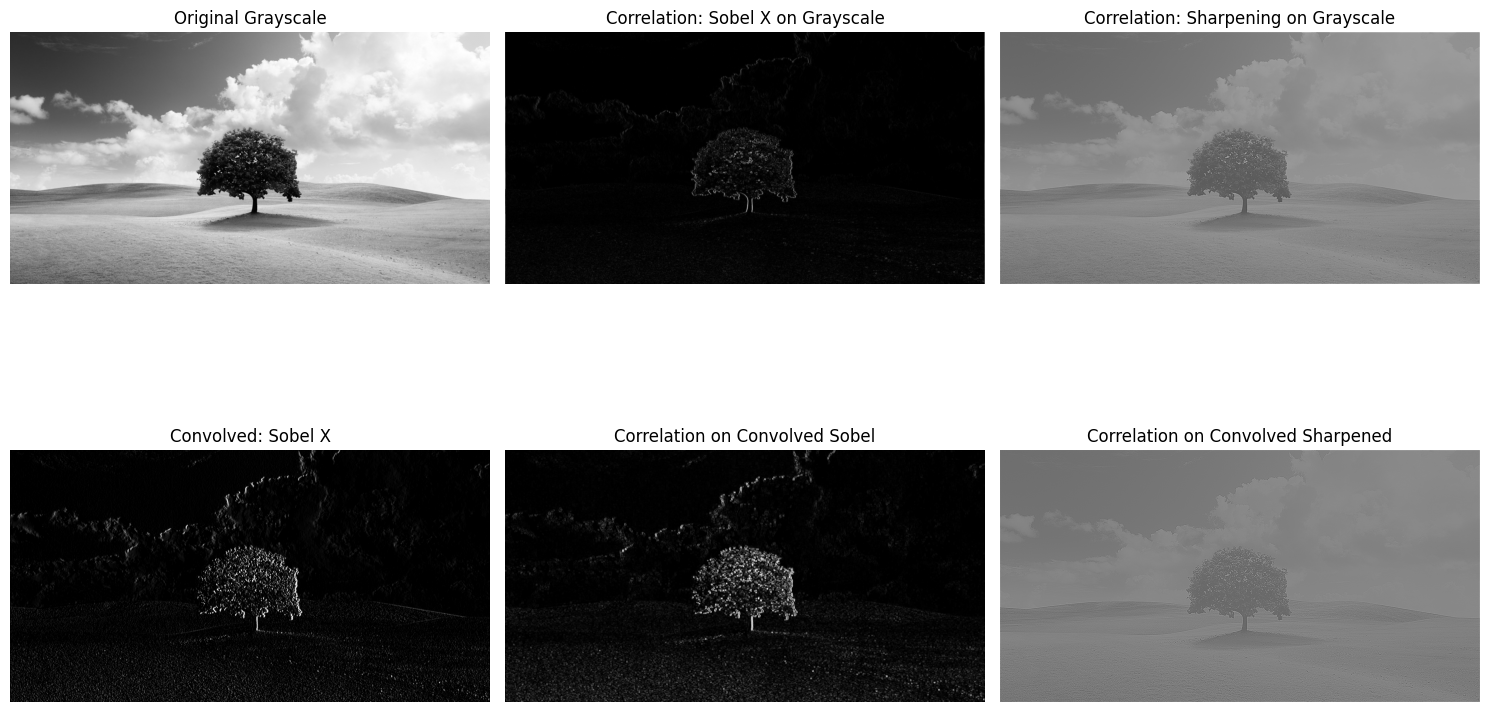

In [17]:
# Display correlation results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Correlation on original grayscale
axes[0,0].imshow(img_gray_builtin, cmap='gray')
axes[0,0].set_title('Original Grayscale')
axes[0,0].axis('off')

axes[0,1].imshow(np.abs(img_corr_sobel), cmap='gray')
axes[0,1].set_title('Correlation: Sobel X on Grayscale')
axes[0,1].axis('off')

axes[0,2].imshow(img_corr_sharp, cmap='gray')
axes[0,2].set_title('Correlation: Sharpening on Grayscale')
axes[0,2].axis('off')

# Row 2: Correlation on convolved images
axes[1,0].imshow(np.abs(img_sobel_x), cmap='gray')
axes[1,0].set_title('Convolved: Sobel X')
axes[1,0].axis('off')

axes[1,1].imshow(np.abs(img_corr_on_conv_sobel), cmap='gray')
axes[1,1].set_title('Correlation on Convolved Sobel')
axes[1,1].axis('off')

axes[1,2].imshow(img_corr_on_conv_sharp, cmap='gray')
axes[1,2].set_title('Correlation on Convolved Sharpened')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

## 4. Edge Detection and Enhancement

In [18]:
# Apply Gaussian blur to the original image
img_gaussian = cv2.GaussianBlur(img_gray_builtin, (5, 5), 1.4)

In [19]:
# Apply edge detection to the Gaussian blurred image
img_gaussian_sobel = cv2.filter2D(img_gaussian, -1, sobel_x_kernel)

In [20]:
# Create enhanced edge-detected image by combining Gaussian blur and edge detection
# Method 1: Add the blurred image and edge detected image
enhanced_edges_add = cv2.addWeighted(img_gaussian, 0.7, np.abs(img_gaussian_sobel), 0.3, 0)

In [21]:
# Method 2: Subtract edge detected image from original to highlight edges
enhanced_edges_subtract = cv2.subtract(img_gray_builtin, np.abs(img_gaussian_sobel).astype(np.uint8))

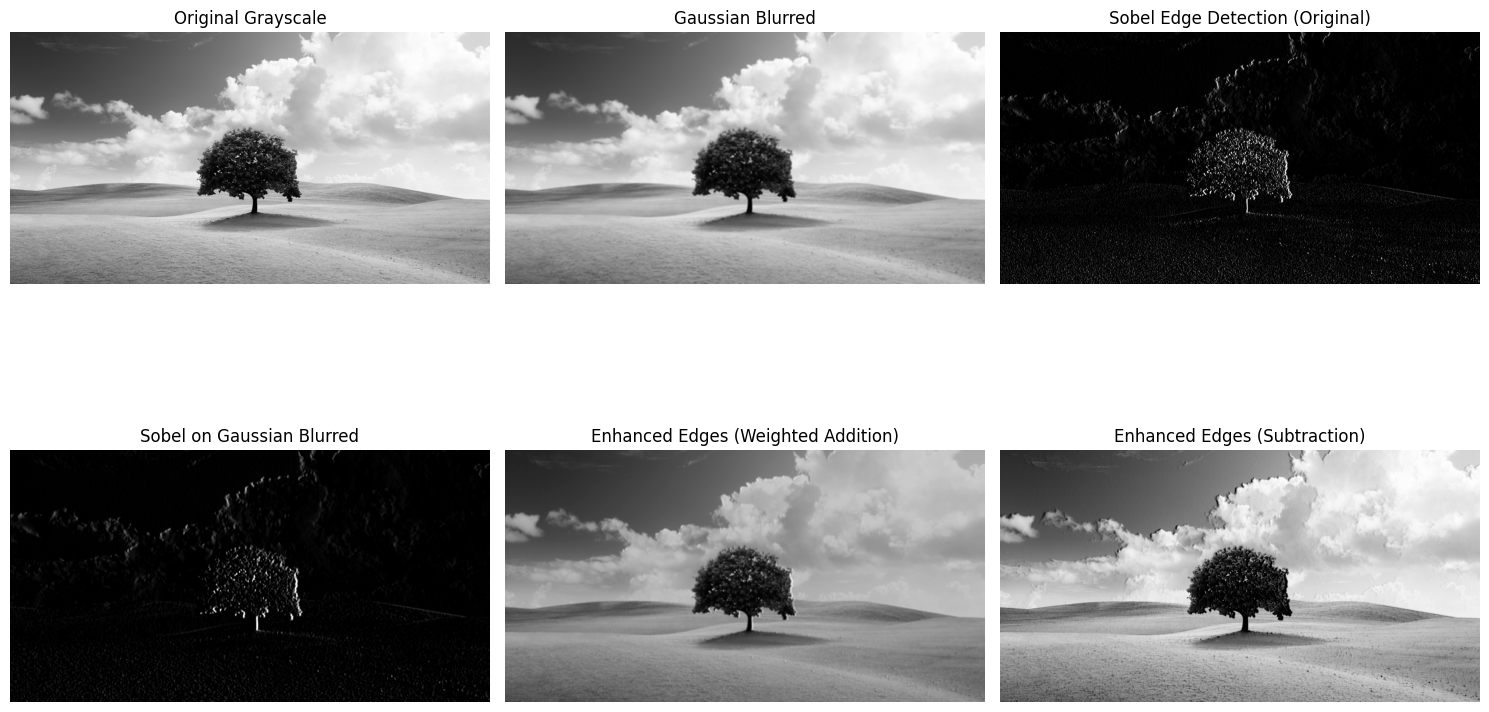

In [22]:
# Display edge detection and enhancement results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Original processes
axes[0,0].imshow(img_gray_builtin, cmap='gray')
axes[0,0].set_title('Original Grayscale')
axes[0,0].axis('off')

axes[0,1].imshow(img_gaussian, cmap='gray')
axes[0,1].set_title('Gaussian Blurred')
axes[0,1].axis('off')

axes[0,2].imshow(np.abs(img_sobel_x), cmap='gray')
axes[0,2].set_title('Sobel Edge Detection (Original)')
axes[0,2].axis('off')

# Row 2: Enhanced edge detection
axes[1,0].imshow(np.abs(img_gaussian_sobel), cmap='gray')
axes[1,0].set_title('Sobel on Gaussian Blurred')
axes[1,0].axis('off')

axes[1,1].imshow(enhanced_edges_add, cmap='gray')
axes[1,1].set_title('Enhanced Edges (Weighted Addition)')
axes[1,1].axis('off')

axes[1,2].imshow(enhanced_edges_subtract, cmap='gray')
axes[1,2].set_title('Enhanced Edges (Subtraction)')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

## 5. Comparison and Analysis

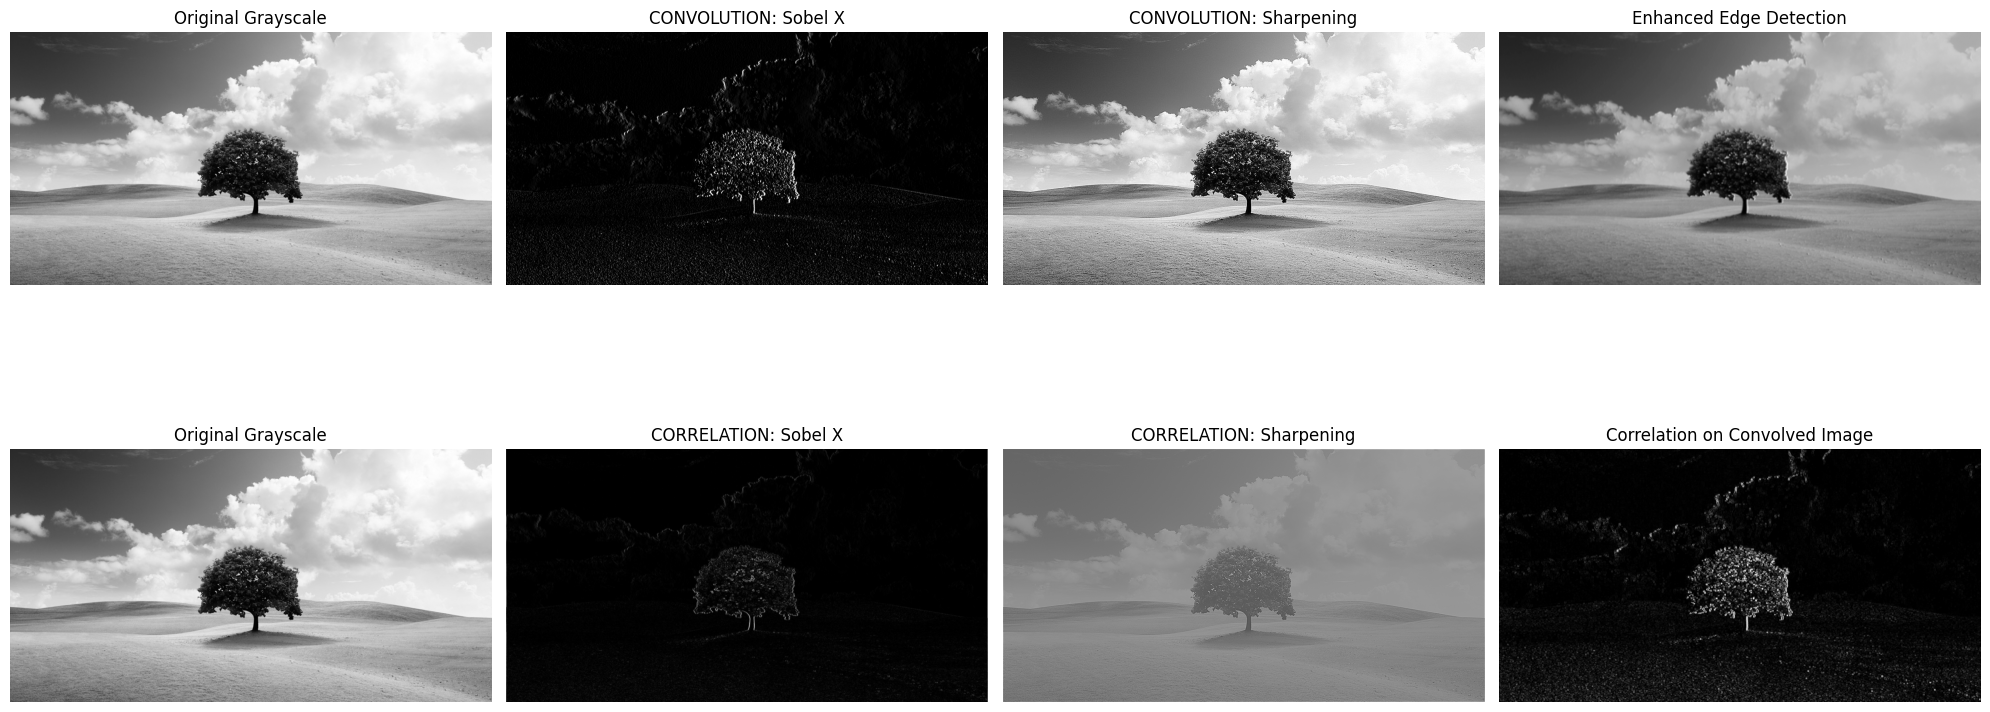

In [23]:
# Compare convolution vs correlation side by side
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Row 1: Convolution results
axes[0,0].imshow(img_gray_builtin, cmap='gray')
axes[0,0].set_title('Original Grayscale')
axes[0,0].axis('off')

axes[0,1].imshow(np.abs(img_sobel_x), cmap='gray')
axes[0,1].set_title('CONVOLUTION: Sobel X')
axes[0,1].axis('off')

axes[0,2].imshow(img_sharpened, cmap='gray')
axes[0,2].set_title('CONVOLUTION: Sharpening')
axes[0,2].axis('off')

axes[0,3].imshow(enhanced_edges_add, cmap='gray')
axes[0,3].set_title('Enhanced Edge Detection')
axes[0,3].axis('off')

# Row 2: Correlation results
axes[1,0].imshow(img_gray_builtin, cmap='gray')
axes[1,0].set_title('Original Grayscale')
axes[1,0].axis('off')

axes[1,1].imshow(np.abs(img_corr_sobel), cmap='gray')
axes[1,1].set_title('CORRELATION: Sobel X')
axes[1,1].axis('off')

axes[1,2].imshow(img_corr_sharp, cmap='gray')
axes[1,2].set_title('CORRELATION: Sharpening')
axes[1,2].axis('off')

axes[1,3].imshow(np.abs(img_corr_on_conv_sobel), cmap='gray')
axes[1,3].set_title('Correlation on Convolved Image')
axes[1,3].axis('off')

plt.tight_layout()
plt.show()

### Interpretation of Results

#### 1. **Grayscale Conversion Analysis:**
- Both built-in and custom grayscale conversion methods produce very similar results
- The custom method uses standard weights R=0.299, G=0.587, B=0.114

#### 2. **Convolution Results Interpretation:**

**Sobel X-direction Edge Detection:**
- Highlights vertical edges in the image by detecting horizontal intensity gradients
- Positive values indicate light-to-dark transitions from left to right
- Negative values indicate dark-to-light transitions from left to right
- The absolute value shows edge strength regardless of transition direction

**Sharpening Filter:**
- Enhances edges and fine details in the image
- The center value (5) amplifies the original pixel
- Surrounding negative values (-1) subtract neighbor influences
- Results in increased contrast and apparent sharpness

#### 3. **Correlation Results Interpretation:**

**Correlation vs Convolution:**
- Correlation does NOT flip the kernel (unlike convolution)
- For symmetric kernels like sharpening filter, results are identical
- For asymmetric kernels like Sobel X, correlation produces horizontally flipped results
- Correlation measures similarity between kernel and image regions

**Correlation on Convolved Images:**
- Applying correlation on already convolved images creates compound effects
- Can enhance or suppress certain features depending on kernel combination
- Useful for template matching and feature detection applications

#### 4. **Edge Detection and Enhancement Analysis:**

**Gaussian Blur + Edge Detection:**
- Gaussian blur reduces noise before edge detection
- Results in cleaner, less noisy edge detection
- Smooths out small details while preserving major structural edges

**Enhancement Methods:**
- Weighted addition combines smooth background with edge information
- Subtraction method emphasizes areas where edges are NOT present
- Both methods provide different visual interpretations of the same data

#### 5. **Key Observations:**

1. **Convolution** is preferred for filtering operations (smoothing, sharpening, edge detection)
2. **Correlation** is preferred for template matching and pattern recognition
3. **Gaussian blur preprocessing** significantly improves edge detection quality
4. **Kernel choice** dramatically affects the type of features highlighted in the image
5. **Combining operations** (blur + edge detection) can create enhanced feature representations